# Data exploration

In [1]:
import pandas as pd    
raw_data = pd.read_json(path_or_buf='Data/07-13-2020.ud.jsonl', lines=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857168 entries, 0 to 3857167
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   defid         int64         
 1   row           int64         
 2   word          object        
 3   meaning       object        
 4   example       object        
 5   contributor   object        
 6   date          datetime64[ns]
 7   upvotes       int64         
 8   downvotes     int64         
 9   crawled_time  datetime64[ns]
 10  gif           object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 323.7+ MB


In [2]:
print(raw_data.gif)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
3857163    NaN
3857164    NaN
3857165    NaN
3857166    NaN
3857167    NaN
Name: gif, Length: 3857168, dtype: object


File contain 3,857,168 definitions

Each row contains a definition for a word -> there can be multiple definitions for a word, and mutliple capitalisations of a word too

In [3]:
# Age range of data
print(raw_data.iloc[raw_data["date"].argmax()]) # 2020-07-13
print(raw_data.iloc[raw_data["date"].argmin()]) # 1999-12-09

defid                                                    15176700
row                                                             3
word                                        Comically Large Spoon
meaning         A spoon that was present in King Bach's ice cr...
example         "Can I get some ice cream?""Only a spoonful."\...
contributor                                                 Bukas
date                                          2020-07-13 00:00:00
upvotes                                                         0
downvotes                                                       0
crawled_time                                  2020-07-13 15:53:13
gif             https://media3.giphy.com/media/5CxttXrbRlaCs/g...
Name: 1432193, dtype: object
defid                                                          12
row                                                            10
word                                                    hard-core
meaning         anything out of our league that

In [4]:
# Dump rows we don't need
del raw_data['row']
del raw_data['contributor']
del raw_data['date']
del raw_data['crawled_time']
del raw_data['gif']

# make all words lower case for ease of computation
raw_data['word'] = raw_data['word'].str.lower()
raw_data['meaning'] = raw_data['meaning'].str.lower()

raw_data['interaction'] = raw_data['upvotes'] + raw_data['downvotes']
raw_data['score'] = raw_data['upvotes'] - raw_data['downvotes']

print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857168 entries, 0 to 3857167
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   defid        int64 
 1   word         object
 2   meaning      object
 3   example      object
 4   upvotes      int64 
 5   downvotes    int64 
 6   interaction  int64 
 7   score        int64 
dtypes: int64(5), object(3)
memory usage: 235.4+ MB
None


In [5]:
def get_slurs(include, exclude, duplicates = False, df = raw_data):
    # include - list of terms use during search of data
    # exclude - list of terms to exclude from words found by include search
    # return - unique terms that contain include terms and does not contain exclude terms
    if not exclude:
        tmp = df[raw_data.meaning.str.contains('|'.join(include))]
    else:
        
        tmp = df[df.meaning.str.contains('|'.join(include))]
        tmp = tmp[~tmp.meaning.str.contains('|'.join(exclude))]
    
    if duplicates:
        return tmp
    else:
        return tmp.drop_duplicates(subset='word')

Keyphrases:
- derogatory term, insulting term, racist term, reclaimed, prejudice, slur
- examples are questionable?

questionable:
- ?

If it contains certain terms -> include it

Do we want to use a ranking system to select terms as some descriptions may have

Do we want to consider contreversial terms which are potentially still used? Could use in the filtering.

In [6]:
# get_slurs(['insert derogatory'], exclude_terms, duplicates=True, df=slurs)

In [7]:
# word = 'bean bean'
# print(raw_data.loc[raw_data['word'] == word]['meaning'].values)

In [8]:
include_terms = ['derogatory term ', 'insulting term ', 'racist term ', 'prejudice term ', 'prejudiced term ', ' a slur ', 'offensive term ']
exclude_terms = [' shutting down racist ', 'useful term', 'to slur your', 'to slur their', 'to slur his', 'insert derogatory',
                 'always slur', 'slur over', 'slur pee', 'you slur', 'intentionally slur', 'from a slur', 
                 'friendly and tender', 'strong feeling', 'non racist term', 'non derogatory term', 'not a slur',
                 'not a racist term', 'was a derogatory term', 'with affection', 'from the common derogatory term',
                 'not a derogatory term']

slurs = get_slurs(include_terms, exclude_terms, duplicates=True)
slurs = slurs[~slurs.word.str.contains('urban dictionary')]
#print(slurs)

In [9]:
# slurs['interaction'] = slurs['upvotes'] + slurs['downvotes']
# slurs['score'] = slurs['upvotes'] - slurs['downvotes']

uses of racist:
- closeted racist who
- a racist gnome
- outright racist remarks
- as racist -> has some issues with certain terms, but lots of good uses 
- a racist stance
- less racist atmosphere/in -> remove?
- less racist way/version/ - keep

- event -> get rid of?

thoughts:
- Would something that is originally a name be considered a slur - i.e. Keemstar
- Could use NER to detect events, real names(A lot of them are slurs) and remove them? Training set not possible

Could be interesting to track the use of names/events and their use? Is it worth it?

In [10]:
slurs = slurs.sort_values(by='interaction', ascending=False)
slurs.drop(slurs[slurs.interaction == 0].index, inplace=True)
slurs.drop_duplicates(subset='word', inplace=True)
slurs.reset_index(drop=True, inplace=True)
print(slurs)
# Specific words meaning
# word = 'doing a "colin"'
# print(slurs.loc[slurs['word'] == word]['meaning'].values)

         defid        word                                            meaning  \
0        36387        cunt  derogatory term for a woman.  considered by ma...   
1       114401        slut  a derogatory term. \n refers to a sexually pro...   
2       217309        twat  1) a great word to shout out.\n2) a woman's va...   
3       741308         bbw  1. a leading term used by many as big beautifu...   
4       246248       skank  derogatory term for a (usually younger) female...   
...        ...         ...                                                ...   
5756  11697812       shube  derogatory term for a vermont native. typicall...   
5757   1939780   buoy-head  derogatory term used to describe a know-it-all...   
5758  12881151  snack-hole                  a derogatory term for the vagina.   
5759  13661370  petaphiles  derogatory term for members or supporters of peta   
5760  13696209     fat cow  although neither of these words are swear word...   

                           

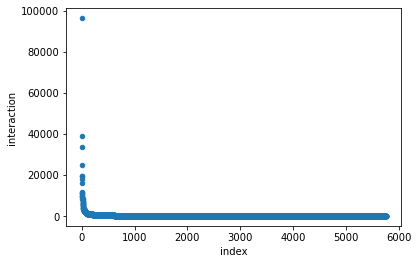

In [11]:
slurs.reset_index(inplace=True)
slurs.plot.scatter(x='index', y='interaction')
del slurs['index']

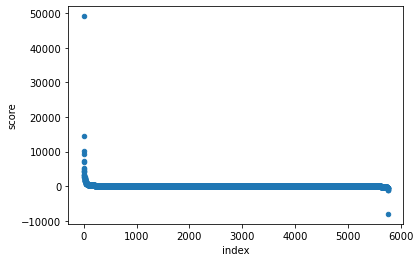

In [12]:
slurs_by_score = slurs.sort_values(by='score', ascending=False)
slurs_by_score.reset_index(inplace=True, drop=True)
slurs_by_score.reset_index(inplace=True)
slurs_by_score.plot.scatter(x='index', y='score')
del slurs_by_score

In [13]:
extraction = slurs.groupby('interaction', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=10))
extraction.shape

(1075, 8)

In [14]:
question_terms = extraction.iloc[::28, :]

In [15]:
print(question_terms)

         defid                      word  \
5657   4046322            hippapottafrog   
5464  11007696             mr. fist bump   
5629  12131316                 moldy tip   
5231  12796730                jj redneck   
5292    696250                   blanger   
5121   5928695                   tose me   
5132  14662931                  oriental   
4849   1073516               flipcracker   
4552   2355924               dingly wert   
4661   5049967             branch weight   
4412  14072960                microballs   
4265   4225954              applethrower   
4123   6640322             nancy no-tits   
3899  10511423                      chit   
3889   2041438                     hekma   
3603   1035939                  chewgger   
3530   5810450                  ice gook   
3403   6457317                 robuttnik   
3208   6247116                       njf   
3080   2032306                         g   
2908   5891220                    pstool   
2828   1434447           man bum

In [16]:
term_list = question_terms.word.tolist()
print(term_list)

['hippapottafrog', 'mr. fist bump', 'moldy tip', 'jj redneck', 'blanger', 'tose me', 'oriental', 'flipcracker', 'dingly wert', 'branch weight', 'microballs', 'applethrower', 'nancy no-tits', 'chit', 'hekma', 'chewgger', 'ice gook', 'robuttnik', 'njf', 'g', 'pstool', 'man bum thumper', 'poputt', 'gewk', 'chundee', 'slutbasket', 'kopitard', 'touch down', 'squid', 'gickna', 'cape', 'fishcake', 'ass-hat', 'gunga', 'schoolgirl', 'collar popper', 'curtain twitcher', 'pepperbelly', 'fbs (fat bitch syndrome)']


In [17]:
for word in term_list:
    print(word + ": ")
    print(raw_data.loc[raw_data['word'] == word]['meaning'].values)
    print("\n")

hippapottafrog: 
['a mix between a hippoptamus and a frog, an offensive term used to describe someone the speaker believes to be ugly.']


mr. fist bump: 
['a derogatory term for a man or woman who is well liked by their teacher, usually the favorite student of the class; this is generally shown by the student and teacher fist bumping.']


moldy tip: 
['noun: derogatory term for military personnel or jrotc students who insist on wearing their uniform everywhere they go to because they think it makes them look cool and want people to admire them. a mt will wear the same uniform for days to the point where the tip of their dicks becomes green with mold from lack of washing. a kt can be seen at children\'s birthday party, little league baseball games, shopping malls, and grocery stores prancing around demanding respect from everyone for their "service" even though they have never seen combat. a moldy tip will insist on being called a veteran and thanked for their service on veterans day, 

['chink + jew + nigger\n a slur used by rednecks in alabama']


ice gook: 
['a derogatory term coined by canadians to reflect their inert racism against its inuit native population. as seen in south park season 15 episode 03, scott the dick, calls an "eskimo" an ice gook. they are known for building igloo\'s, sleeping with huskies, robbing parked cars, drinking lysol, huffing gas soaked rags, incest and fantastic whale blubber meat sauce on spaghetti. fortunately this term is being taken back, so they quite often call themselves ice gooks, example:ig1: "yo my ice gook! whats up?"ig2: "just stealing this car to take to auto pawn so i can bail my sister out, so she can call her ex-boyfriend and he can talk to his uncle about getting some weed."ig1: "dirty ice gook, get the fuck away from my car!"ig2: "it was my uncle henry man! not me!"there\'s a theory that the early mongoloid men of the ice age crossed the trans-siberian ice bridge and these are their descendants. just don\'t leave you

['a derogatory term used to politly call someone ghey or g4y or gay, homo or f4g fag.']


poputt: 
['derogatory term used by professional wrestler booker t. no real definition or place of origin exists.']


gewk: 
['pronounced (gee-you-k)\n gewk is in reference to the derogatory term for asians... gook.']


chundee: 
['a derogatory term used to identify a person of african american decent, usually children.'
 'another name for marijuana, or pot.']


slutbasket: 
['derogatory term used to describe a slut of such magnitude that she would literally need a basket in which to carry such sluttery. '
 'derogatory term used to describe a slut of such magnitude that she would literally need a basket in which to carry such sluttery. \n'
 'a group of horny and drunk women '
 'a slutty basket. can also refer to an annoying, stupid person.']


kopitard: 
['a derogatory term for a kings fan, or somebody who is a fan of anze koptar. see also, kopitardedp.s go wild!']


touch down: 
['1.a derogatory t

['a point or head of land projecting into a body of water.\n'
 'a quidditch player who is into harry potter.'
 "military slang for:\ncorrective action thru physical\nexercise\n see 'smoked'"
 "cape saint claire. a neighborhood in annapolis md, where dozens of little white boys try their hardest to be black. they wish they lived in baltimore, although don't have any real idea of what it would be like. some carry guns thinking they are cool. some do coke. most of all they are all wiggers. little wannabe niggers."
 'when someone is protecting, covering for or being a “hero” for another person.'
 'when a gay woman has a boyfriend/husband or child in an attempt to cover the fact she is gayfemale equivalent of when a gay man calls his girlfriend a "beard"'
 'jacket or coat'
 "a totally awesome article of clothing. almost anybody who wears a cape will look cool, and anybody who is badass can greatly benefit from wearing either a cape, cloak, or trenchcoat, and of course, having long hair. hav

['the adjective used to describe only the most elite and deserving people, which is very few on top of the fact that it is only females. only one has ever been born and shes smart, a girl, and goes to school. not to mention funny and nice and goes by the name of "lil brooke"'
 'a derogatory term used to refer to a young girl (late teens/early 20s) who is intelligent and well-educated, but naive and gullible. she thinks she knows it all when, in fact, she has almost no understanding of the world other than what she was told in the classroom. she thinks knowledge compensates for good judgment and experience.'
 '1)a girl who attends school, usu. referring to private or preparatory schools where uniforms are wore.\n2)any female wearing a uniform similar to that of a private/prep school student. uniform consists of a white, short-sleeved top, sweater, plaid/single colored skirt, knee-high socks, and loafers; usu. referred to in the sense of a fetish.'
 "usually seen on websites for dirty ol

In [18]:
def find_most_interacted_definition(word):
    word_ref = raw_data[raw_data['word'] == word]
    return word_ref[word_ref.interaction == word_ref.interaction.max()]

In [19]:
tmp_df = pd.DataFrame(columns=raw_data.columns)

for word in term_list:
    tmp_df = pd.concat([tmp_df, find_most_interacted_definition(word)], ignore_index=True)

In [20]:
tmp_df = tmp_df.sort_values(by='interaction', ascending=False)
tmp_df.reset_index(drop=True, inplace=True)

tmp_df

,defid,word,meaning,example,upvotes,downvotes,interaction,score
0,67183,g,1. a gangster 2. a thousand dollars\n 3. a ti...,1. Thats a real G.\n 2. Let me borrow a G.\n 3...,9157,2099,11256,7058
1,41450,squid,a young motorcyclist who overestimates his abi...,We were suddenly passed by a chromed out R1 an...,3114,715,3829,2399
2,958765,ass-hat,one whose head is so far up their rear end it ...,"Leave 'em alone, asshat!",2072,458,2530,1614
3,374592,oriental,"politically incorrect term used in place of ""a...",Correct usage: There's an Oriental rug store o...,1189,925,2114,264
4,5942568,chit,a little mexican beef. commonly found at fast ...,Chit is like a little Mexican beef.,376,202,578,174
5,1958599,fbs (fat bitch syndrome),a derogatory term used to describe particuly f...,"Beth/Ashlyn: ""ZOMFG I know everything, I am be...",240,105,345,135
6,973579,schoolgirl,usually seen on websites for dirty old men who...,Stop looking at that schoolgirl porn you sick ...,154,115,269,39
7,1276043,collar popper,1. one who is unusually proud of his homosexu...,That collar popper is the biggest douche ever....,162,93,255,69
8,526415,gunga,(derived from smegma)\n the combinatory detrit...,"When wiping one's ass, be sure to get all that...",160,86,246,74
9,1809971,cape,a totally awesome article of clothing. almost ...,That dude with the cape is so freakin' awesome...,139,102,241,37


In [21]:
tmp_df = tmp_df.assign(vote=[16, 1, 43, 38, 4, 0, 18, 5, 0, 1, 0, 4, 21, 0, 0, 0, 0, 7, 1, 2, 0, 3, 0, 0, 3, 3, 2, 0, 18, 0, 8, 0, 0, 0, 0, 3, 3, 1, 0])
tmp_df = tmp_df.sort_values(by='interaction', ascending=True)

<AxesSubplot:xlabel='word'>

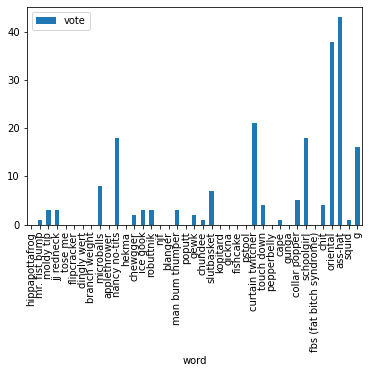

In [22]:
tmp_df.plot.bar(x='word', y='vote')

<AxesSubplot:xlabel='word'>

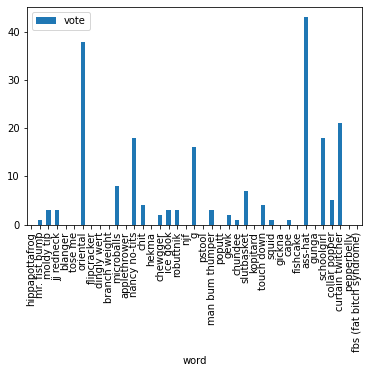

In [23]:
question_terms = pd.merge(question_terms,tmp_df[['word','vote']],on='word', how='left')
question_terms.plot.bar(x='word', y='vote')

In [24]:
print(tmp_df['vote'].mean())
print(tmp_df['vote'].std())

5.256410256410256
9.983454598584466


(39, 9)
(4, 9)
578
34


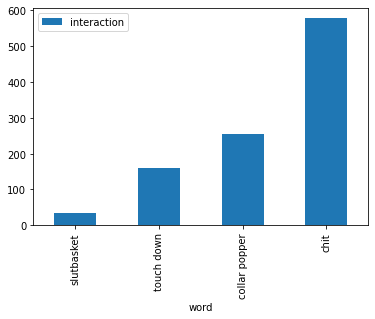

In [25]:
mn = tmp_df['vote'].mean()
std = tmp_df['vote'].std()
std_percent = 5

res = tmp_df[(tmp_df['vote'] >= mn-(std/std_percent)) & (tmp_df['vote'] <= mn+(std/std_percent))]
print(tmp_df.shape)
print(res.shape)
res.plot.bar(x='word', y='interaction')
print(res.interaction.max())
print(res.interaction.min())

<AxesSubplot:xlabel='index', ylabel='interaction'>

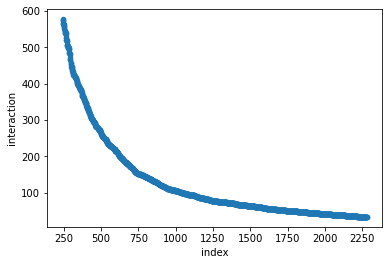

In [26]:
# Get slurs using range listed above
slurs_subset = slurs[(slurs['interaction'] >= res.interaction.min()) & (slurs['interaction'] <= res.interaction.max())]

# Take out words that are less than 3 letters long
slurs_subset = slurs_subset[[len(x) > 2 for x in slurs_subset.word.tolist()]]

# Count number of words and remove terms longer than 3 words
def word_count(string):
    return(len(string.strip().split(" ")))
slurs_subset = slurs_subset[[word_count(x) <= 3 for x in slurs_subset.word.tolist()]]

slurs_subset.reset_index(inplace=True)
slurs_subset.plot.scatter(x='index', y='interaction')

In [27]:
print(slurs_subset.shape)

(2001, 9)


In [28]:
slurs_subset.to_csv('Data/slur_subset.csv', columns = ['word'], index = False)